## Funções fixas

In [8]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Raio da Terra em km
    R = 6371.0
    
    # Converter de graus para radianos
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Diferença de coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Fórmula de Haversine
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))
    
    # Distância
    distance = R * c
    return distance


In [9]:
def dms_para_dd(graus, minutos, segundos, direcao):
    # Converter para graus decimais
    decimal = graus + (minutos / 60) + (segundos / 3600)
    
    # Ajustar o sinal para Sul e Oeste
    if direcao in ['S', 'W']:
        decimal = -decimal
    
    return decimal


In [10]:
import re

def converter_coordenada(coordenada):
    # Expressão regular para extrair os valores de graus, minutos, segundos e direção
    match = re.match(r"(\d+)° (\d+)' (\d+)'' (\w)", coordenada)
    
    if match:
        graus = int(match.group(1))
        minutos = int(match.group(2))
        segundos = int(match.group(3))
        direcao = match.group(4)

        # Chamar a função de conversão
        return dms_para_dd(graus, minutos, segundos, direcao)
    else:
        return None  # Caso a string não corresponda ao formato esperado

In [11]:
import random

def gerar_assentos_ocupados(assentos_totais):
    percentual_ocupacao = random.uniform(0.5, 0.95)  # Escolhe um percentual entre 50% e 95%
    return int(assentos_totais * percentual_ocupacao)

## Importação das bases

In [12]:
import pandas as pd

df_aeroportos = pd.read_excel('bases/aeroportos.xls', date_format='utf-8', skiprows=2)


In [13]:
df_empresas = pd.read_excel('bases/empresas_aereas.xls', date_format='utf-8', skiprows=3)

df_empresas = df_empresas.drop(columns=["Unnamed: 0", "Unnamed: 3"])


In [14]:
df_voos = pd.read_csv('bases/VRA_20240916110513.csv', sep=";")


C:\Users\vinis\AppData\Local\Temp\ipykernel_17016\3110746896.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_voos = pd.read_csv('bases/VRA_20240916110513.csv', sep=";")


In [15]:
df_reclamacoes2022 = pd.read_csv('bases/reclamacoes/dadosconsumidor2022.csv', sep=";", skiprows=1)

df_reclamacoes2023 = pd.read_csv('bases/reclamacoes/dadosconsumidor2023.csv', sep=";", skiprows=1)

In [16]:
df_reclamacoes = pd.concat([df_reclamacoes2022,df_reclamacoes2023], ignore_index=True)


## Exploração das tabelas e visualização das colunas

In [17]:
print(df_aeroportos.dtypes)


CÓDIGO OACI                                                                                         object
CIAD                                                                                                object
NOME                                                                                                object
MUNICÍPIO ATENDIDO                                                                                  object
UF                                                                                                  object
LATITUDE                                                                                            object
LONGITUDE                                                                                           object
ALTITUDE                                                                                            object
OPERAÇÃO                                                                                            object
DESIGNAÇÃO                           

In [18]:
print(df_empresas.dtypes)

Sigla OACI                 object
Nome Empresas              object
Nacional ou Estrangeira    object
dtype: object


In [19]:
print(df_reclamacoes.dtypes)

Gestor                             object
Região                             object
UF                                 object
Cidade                             object
Ano Abertura                        int64
Mês Abertura                        int64
Data Abertura                      object
Data e Hora Resposta               object
Data e Hora Análise                object
Data e Hora Recusa                 object
Data Finalização                   object
Prazo Resposta                     object
Prazo Análise Gestor (em dias)    float64
Tempo Resposta (em dias)          float64
Nome Fantasia                      object
Área                               object
Assunto                            object
Grupo Problema                     object
Problema                           object
Forma Contrato                     object
Procurou Empresa                   object
Respondida                         object
Situação                           object
Avaliação Reclamação              

In [20]:
print(df_voos.dtypes)

Sigla ICAO Empresa Aérea         object
Empresa Aérea                    object
Número Voo                       object
Código DI                        object
Código Tipo Linha                object
Modelo Equipamento               object
Número de Assentos                int64
Sigla ICAO Aeroporto Origem      object
Descrição Aeroporto Origem       object
Partida Prevista                 object
Partida Real                     object
Sigla ICAO Aeroporto Destino     object
Descrição Aeroporto Destino      object
Chegada Prevista                 object
Chegada Real                     object
Situação Voo                     object
Justificativa                   float64
Referência                       object
Situação Partida                 object
Situação Chegada                 object
dtype: object


In [21]:
df_voos.head(5)

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Justificativa,Referência,Situação Partida,Situação Chegada
0,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,I,E145,50,SKLT,ALFREDO VÁSQUEZ COBO INTERNATIONAL AIRPORT - L...,27/08/2023 18:10,27/08/2023 19:00,SLVR,VIRU VIRU INTERNATIONAL AIRPORT - SANTA CRUZ -...,27/08/2023 21:00,27/08/2023 21:50,REALIZADO,NaN,27/08/2023 00:00:00,Atraso 30-60,Atraso 30-60
1,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,X,E145,50,SBCY,MARECHAL RONDON - VÁRZEA GRANDE - MT - BRASIL,NaN,31/08/2023 07:07,SBEG,EDUARDO GOMES - MANAUS - AM - BRASIL,NaN,31/08/2023 09:19,REALIZADO,NaN,27/08/2023 00:00:00,NaN,NaN
2,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,X,E145,50,SBEG,EDUARDO GOMES - MANAUS - AM - BRASIL,NaN,31/08/2023 10:50,SKPE,MATECAÑA INTERNATIONAL AIRPORT - PEREIRA - COL...,NaN,31/08/2023 13:36,REALIZADO,NaN,27/08/2023 00:00:00,NaN,NaN
3,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,X,E145,50,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,NaN,31/08/2023 02:15,SBCY,MARECHAL RONDON - VÁRZEA GRANDE - MT - BRASIL,NaN,31/08/2023 04:55,REALIZADO,NaN,27/08/2023 00:00:00,NaN,NaN
4,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,7,I,E145,50,SLVR,VIRU VIRU INTERNATIONAL AIRPORT - SANTA CRUZ -...,27/08/2023 22:00,27/08/2023 22:54,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,28/08/2023 00:55,28/08/2023 01:23,REALIZADO,NaN,27/08/2023 00:00:00,Atraso 30-60,Pontual


## Selecionando apenas as colunas necessárias

In [22]:
df_voos_selected = df_voos[['Sigla ICAO Empresa Aérea', 'Empresa Aérea', 'Número Voo',
                            'Número de Assentos', 'Sigla ICAO Aeroporto Origem',
                            'Partida Prevista', 'Partida Real', 'Sigla ICAO Aeroporto Destino',
                            'Chegada Prevista','Chegada Real', 'Situação Voo']]

In [23]:
df_aeroportos_selected =  df_aeroportos[['CÓDIGO OACI', 'CIAD', 'NOME', 'LATITUDE', 'LONGITUDE']]

### Filtrando voos domésticos

In [24]:
# Realizando o merge para aeroportos de origem
df_voos_brasil_origem = pd.merge(df_voos_selected, df_aeroportos_selected,
                                 left_on='Sigla ICAO Aeroporto Origem', right_on='CÓDIGO OACI',
                                 how='inner')

# Realizando o merge para aeroportos de destino
df_voos_brasil_destino = pd.merge(df_voos_brasil_origem, df_aeroportos_selected,
                                  left_on='Sigla ICAO Aeroporto Destino', right_on='CÓDIGO OACI',
                                  how='inner',
                                  suffixes=('_origem', '_destino'))

# Selecionando apenas os voos domésticos (com origem e destino no Brasil)
df_voos_domesticos = df_voos_brasil_destino[['Sigla ICAO Empresa Aérea', 'Empresa Aérea', 'Número Voo',
                                             'Número de Assentos', 'Sigla ICAO Aeroporto Origem',
                                             'Partida Prevista', 'Partida Real', 'Sigla ICAO Aeroporto Destino',
                                             'Chegada Prevista', 'Chegada Real', 'Situação Voo', 'NOME_origem', 
                                             'NOME_destino', 'LATITUDE_origem', 'LONGITUDE_origem',
                                             'LATITUDE_destino', 'LONGITUDE_destino']]

# Mostrando o resultado
df_voos_domesticos.head(5)

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Número de Assentos,Sigla ICAO Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,NOME_origem,NOME_destino,LATITUDE_origem,LONGITUDE_origem,LATITUDE_destino,LONGITUDE_destino
0,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBCY,NaN,31/08/2023 07:07,SBEG,NaN,31/08/2023 09:19,REALIZADO,MARECHAL RONDON,EDUARDO GOMES,15° 39' 0'' S,56° 7' 3'' W,3° 2' 28'' S,60° 3' 2'' W
1,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBGR,NaN,31/08/2023 02:15,SBCY,NaN,31/08/2023 04:55,REALIZADO,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MARECHAL RONDON,23° 26' 8'' S,46° 28' 23'' W,15° 39' 0'' S,56° 7' 3'' W
2,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBGR,31/08/2023 02:15,NaN,SBCY,31/08/2023 04:40,NaN,CANCELADO,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MARECHAL RONDON,23° 26' 8'' S,46° 28' 23'' W,15° 39' 0'' S,56° 7' 3'' W
3,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBCY,31/08/2023 05:40,NaN,SBEG,31/08/2023 08:15,NaN,CANCELADO,MARECHAL RONDON,EDUARDO GOMES,15° 39' 0'' S,56° 7' 3'' W,3° 2' 28'' S,60° 3' 2'' W
4,AAL,"AMERICAN AIRLINES, INC.",0963,285,SBGL,NaN,21/06/2023 09:05,SBGR,NaN,21/06/2023 10:26,REALIZADO,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,22° 48' 36'' S,43° 15' 2'' W,23° 26' 8'' S,46° 28' 23'' W


### Tratando as colunas de latitude e longitude

In [25]:
df_voos_domesticos = df_voos_domesticos.assign(
    LATITUDE_origem_decimal=df_voos_domesticos['LATITUDE_origem'].apply(converter_coordenada),
    LATITUDE_destino_decimal=df_voos_domesticos['LATITUDE_destino'].apply(converter_coordenada),
    LONGITUDE_origem_decimal=df_voos_domesticos['LONGITUDE_origem'].apply(converter_coordenada),
    LONGITUDE_destino_decimal=df_voos_domesticos['LONGITUDE_destino'].apply(converter_coordenada)
)

df_voos_domesticos = df_voos_domesticos.drop(['LATITUDE_origem', 'LATITUDE_destino', 'LONGITUDE_origem', 'LONGITUDE_destino'], axis=1)

In [26]:
df_voos_domesticos = df_voos_domesticos.rename(columns={'LATITUDE_origem_decimal': 'lat_origem',
                        'LONGITUDE_origem_decimal': 'lon_origem',
                        'LATITUDE_destino_decimal': 'lat_destino',
                        'LONGITUDE_destino_decimal': 'lon_destino'})

### Calculando a distância entre os aeroportos de origem e destino

In [27]:
df_voos_domesticos['distancia'] = df_voos_domesticos.apply(lambda row: haversine(row['lat_origem'], row['lon_origem'], row['lat_destino'], row['lon_destino']), axis=1)

df_voos_domesticos.head(5)

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Número de Assentos,Sigla ICAO Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,NOME_origem,NOME_destino,lat_origem,lat_destino,lon_origem,lon_destino,distancia
0,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBCY,NaN,31/08/2023 07:07,SBEG,NaN,31/08/2023 09:19,REALIZADO,MARECHAL RONDON,EDUARDO GOMES,-15.650000,-3.041111,-56.117500,-60.050556,1466.673883
1,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBGR,NaN,31/08/2023 02:15,SBCY,NaN,31/08/2023 04:55,REALIZADO,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MARECHAL RONDON,-23.435556,-15.650000,-46.473056,-56.117500,1329.813082
2,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBGR,31/08/2023 02:15,NaN,SBCY,31/08/2023 04:40,NaN,CANCELADO,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,MARECHAL RONDON,-23.435556,-15.650000,-46.473056,-56.117500,1329.813082
3,1ED,SERVICIOS AÉREOS PANAMERICANOS LTDA. SARPA S.A.S,5330,50,SBCY,31/08/2023 05:40,NaN,SBEG,31/08/2023 08:15,NaN,CANCELADO,MARECHAL RONDON,EDUARDO GOMES,-15.650000,-3.041111,-56.117500,-60.050556,1466.673883
4,AAL,"AMERICAN AIRLINES, INC.",0963,285,SBGL,NaN,21/06/2023 09:05,SBGR,NaN,21/06/2023 10:26,REALIZADO,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO/GALE...,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO,-22.810000,-23.435556,-43.250556,-46.473056,336.791839


### Adicionando coluna do numero de assentos ocupados gerados de forma randomica

In [28]:
df_voos_domesticos['assentos_ocupados'] = df_voos_domesticos.apply(lambda row: gerar_assentos_ocupados \
                                                                    (row['Número de Assentos']), axis=1) 

In [29]:
df_voos_domesticos.columns

Index(['Sigla ICAO Empresa Aérea', 'Empresa Aérea', 'Número Voo',
       'Número de Assentos', 'Sigla ICAO Aeroporto Origem', 'Partida Prevista',
       'Partida Real', 'Sigla ICAO Aeroporto Destino', 'Chegada Prevista',
       'Chegada Real', 'Situação Voo', 'NOME_origem', 'NOME_destino',
       'lat_origem', 'lat_destino', 'lon_origem', 'lon_destino', 'distancia',
       'assentos_ocupados'],
      dtype='object')

In [30]:
df_reclamacoes2022.columns

Index(['Gestor', 'Região', 'UF', 'Cidade', 'Ano Abertura', 'Mês Abertura',
       'Data Abertura', 'Data e Hora Resposta', 'Data e Hora Análise',
       'Data e Hora Recusa', 'Data Finalização', 'Prazo Resposta',
       'Prazo Análise Gestor (em dias)', 'Tempo Resposta (em dias)',
       'Nome Fantasia', 'Área', 'Assunto', 'Grupo Problema', 'Problema',
       'Forma Contrato', 'Procurou Empresa', 'Respondida', 'Situação',
       'Avaliação Reclamação', 'Nota do Consumidor', 'Edição de Conteúdo',
       'Interação do Gestor', 'Código Classificador ANAC'],
      dtype='object')

In [31]:
df_reclamacoes2022['Nome Fantasia']

0            Gol Linhas Aéreas
1            Gol Linhas Aéreas
2         Latam Airlines (Tam)
3            Gol Linhas Aéreas
4            Gol Linhas Aéreas
                  ...         
114465    Latam Airlines (Tam)
114466    Latam Airlines (Tam)
114467    Latam Airlines (Tam)
114468       Gol Linhas Aéreas
114469         Delta Air Lines
Name: Nome Fantasia, Length: 114470, dtype: object

### Separando tabelas conforme modelagem

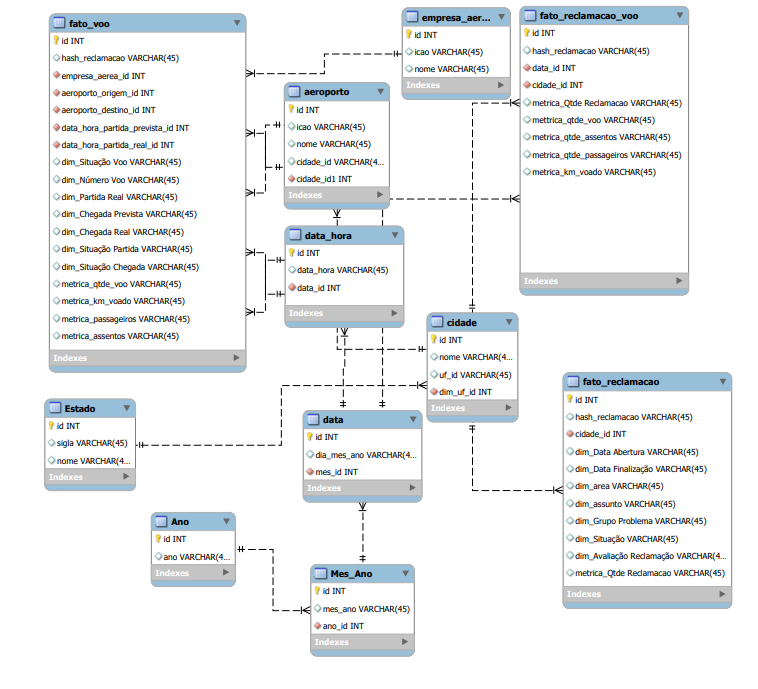

In [39]:
#tabela estado
data = {
    'Estado': ['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará', 'Distrito Federal', 'Espírito Santo', 
               'Goiás', 'Maranhão', 'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará', 'Paraíba', 
               'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro', 'Rio Grande do Norte', 'Rio Grande do Sul', 
               'Rondônia', 'Roraima', 'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
    'Sigla': ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 
              'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
}

tb_estado = pd.DataFrame(data)
tb_estado['ID'] = tb_estado.index + 1
tb_estado = tb_estado[['ID', 'Estado', 'Sigla']]


In [38]:
#tabela cidade

tb_cidade = df_aeroportos[['MUNICÍPIO ATENDIDO', 'UF']]

tb_cidade = tb_cidade.merge(tb_estado, left_on= )



0      CONCEIÇÃO DO ARAGUAIA
1            BAURU E AREALVA
2                 ARARAQUARA
3                    ARACAJU
4              ALTA FLORESTA
               ...          
528           NOVA XAVANTINA
529                     APUÍ
530                SÃO ROQUE
531    SANTA RITA DO SAPUCAÍ
532            CORREIA PINTO
Name: MUNICÍPIO ATENDIDO, Length: 533, dtype: object

In [35]:
#tabela aeroporto

print(df_aeroportos_selected.columns)
print()
print(df_aeroportos.columns)


Index(['CÓDIGO OACI', 'CIAD', 'NOME', 'LATITUDE', 'LONGITUDE'], dtype='object')

Index(['CÓDIGO OACI', 'CIAD', 'NOME', 'MUNICÍPIO ATENDIDO', 'UF', 'LATITUDE',
       'LONGITUDE', 'ALTITUDE', 'OPERAÇÃO', 'DESIGNAÇÃO', 'COMPRIMENTO',
       'LARGURA', 'RESISTÊNCIA', 'SUPERFÍCIE', 'DESIGNAÇÃO.1', 'COMPRIMENTO.1',
       'LARGURA.1', 'RESISTÊNCIA.1', 'SUPERFÍCIE.1', 'DESIGNAÇÃO.2',
       'COMPRIMENTO.2', 'LARGURA.2', 'RESISTÊNCIA.2', 'SUPERFÍCIE.2',
       'RAMPA(S) DE APROXIMAÇÃO', 'FORMATO DA ÁREA DE POUSO', 'DIMENSÕES',
       'RESISTÊNCIA.3', 'SUPERFÍCIE.3', 'p1', 'p2', 'p3', 'p4', 'PORTARIAS',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'PORTARIA Nº 708/2020 E ALTERAÇÕES',
       'PORTARIA Nº 1540/2020\nA Classe I se divide ainda em I-A, sem voo regular e I-B, com voo regular',
       'PORTARIA Nº 2007/2014 E ALTERAÇÕES\n(* = REGIME TARIFÁRIO DIFERENCIADO)',
       'AERONAVE CRÍTICA', 'TIPO DE APROX. (CABECEIRAS)', 'FREQ. SEMANAL',
       'r1', 'r2', 'REFERÊNCIA(S)', '